# **Challenge Of The Week- Pandas and MatPlotLib**

## **Challenge:**

#### **Your friends are doing a group research to find out if there's any relationship between the average number of hours a student studies everyday vs the marks they get. For this, they collected data of 200 random students across the school via survey forms. Very much as expected, many students took it lightly and gave incorrect data. Because of this, they're unable to find an easy way out to solve this issue.**
Its your time to help your friends with the knowledge of Python programming. Here's what you need to do:

1. Create a random dataset having details of 200 students with columns for Average percentage and Average hours studied in a day. 
2. Fill random entries in the dataset and put some error values too like Average percentage less than 0 or greater than100, Hours studied less than 0 or greater than 10.

3. Use pre-defined functions from Pandas package to remove entries having erroneous data. 
4. Plot a line graph and a scatter plot to find out the relation between the parameters.
5. Print the conclusion of your observation as the final output of your code.

In [117]:
# Import modules first of all

#pandas for managing data

import pandas as pd

# numpy for some minute tasks

import numpy as np

# matplotlib for plottation

import matplotlib

In [118]:
# import our raw dataset to the program and store it in a var

main_df = pd.read_csv('data_students_avg.csv')

In [119]:
# Raw Data

main_df

,Avg. Percentage,Avg Hours
0,90,8
1,91,5
2,82,6
3,45,2
4,32,9
...,...,...
195,94,9
196,95,6
197,86,7
198,-23,5


In [120]:
# Making navigation easier by making indexes start at 1

main_df.index = main_df.index + 1

### Our Basic Workflow for Data Cleaning

1. Create lists of the items in a DF Column

2. Make new lists. Use some defined functions to check the appropriate data and fill them in THE NEW lists

3. Inappropriate data to be replaced by None value

4. Make a DataFrame of the improved lists

5. Sort the values in Descending Order. Use dropna() to drop all null rows

6. After cleaning data, create a new clean data file

In [121]:
avg_pct = main_df['Avg. Percentage'].tolist()
avg_hrs = main_df['Avg Hours'].tolist()

In [122]:
ls = []
lf = []
def change(n, listnam):
    if n<100 and n>0:
        listnam.append(n)
    else:
        listnam.append(None)
        
def changef(n, listnam):
    if n>=0 and n<10:
        listnam.append(n)
    else:
        listnam.append(None)    

for i in avg_pct:
    change(i, ls)
    
for i in avg_hrs:
    changef(i, lf)
    
clean_data = {
    'Avg. Pct': ls,
    'Avg. Hrs': lf
}

clean_df = pd.DataFrame(clean_data)
clean_df.index = clean_df.index + 1
clean_df

,Avg. Pct,Avg. Hrs
1,90.0,8.0
2,91.0,5.0
3,82.0,6.0
4,45.0,2.0
5,32.0,9.0
...,...,...
196,94.0,9.0
197,95.0,6.0
198,86.0,7.0
199,NaN,5.0


In [123]:
clean_df.dtypes

Avg. Pct    float64
Avg. Hrs    float64
dtype: object

In [124]:
clean_df = clean_df.sort_values(by='Avg. Pct', ascending=False)
clean_df = clean_df.dropna()
clean_df.to_csv('Cleaned_data_of_students.csv')

### Basic Workflow of Plotation of Data

1. Read the cleaned data csv

2. Plot a scatter plot and organize it a bit

3. Plot a line graph and organize it a bit

4. Find the correlation between the Avg. Hrs and Avg. Pct by using the corr() function of pandas

5. Prin

In [125]:
import matplotlib.pyplot as plt

In [126]:
food = pd.read_csv('Cleaned_data_of_students.csv')

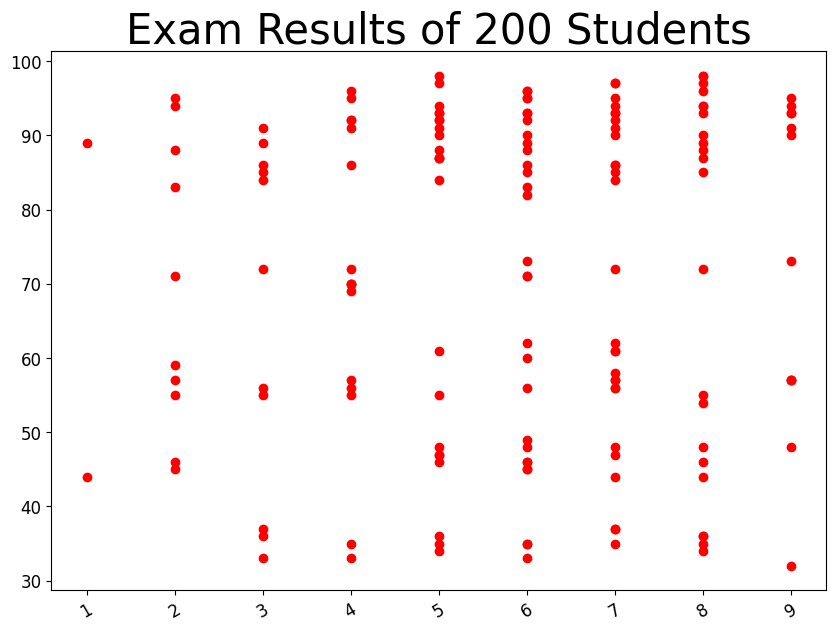

<Figure size 640x480 with 0 Axes>

In [127]:
x = food['Avg. Hrs']
y = food['Avg. Pct']
plt.figure(figsize=(10,7))
plt.scatter(x,y, c='red')
plt.xticks(np.arange(1, 10, 1))
plt.xticks (rotation = 30)
plt.xlabel = 'Hours Studied'
plt.ylabel = 'Marks Obtained'
plt.title('Exam Results of 200 Students', fontsize = 30)
plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)
plt.show()

plt.savefig('ScatterPlot.jpg')

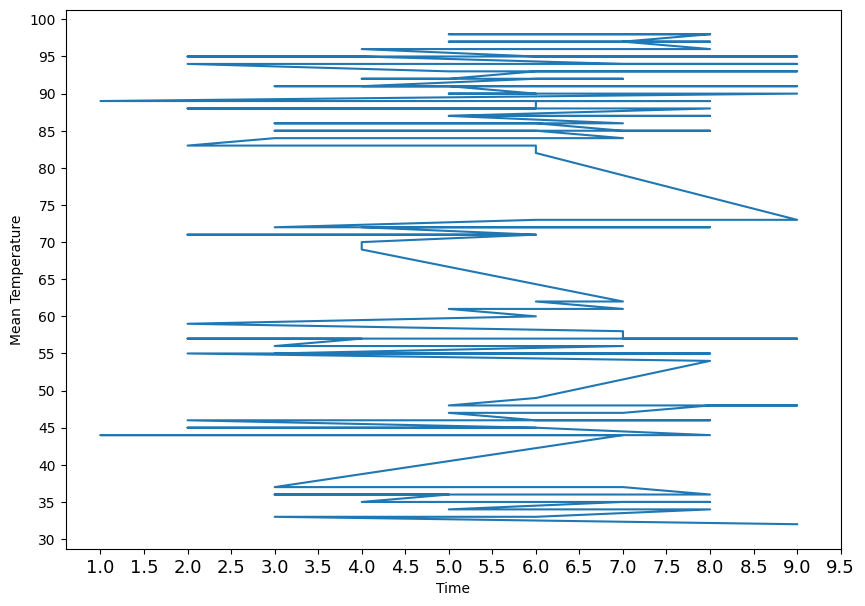

In [128]:
from importlib import reload
plt=reload(plt)
x = food.index
y_1 = food['Avg. Pct']
y_2 = food['Avg. Hrs']
plt.figure(figsize=(10,7))
SC = plt.plot(y_2, y_1)
plt.ylabel("Mean Temperature")
plt.xlabel("Time")

plt.xticks(np.arange(1, 10, 0.5), fontsize=13)
plt.yticks(np.arange(30,105, 5))
plt.show()

In [129]:
corelation = food.corr(method='kendall')

print('The relation between the Avg Hours studied and the Avg. Marks Obtained is  \n\n', corelation)


The relation between the Avg Hours studied and the Avg. Marks Obtained is  

             Unnamed: 0  Avg. Pct  Avg. Hrs
Unnamed: 0    1.000000  0.059951  0.230536
Avg. Pct      0.059951  1.000000  0.057868
Avg. Hrs      0.230536  0.057868  1.000000


In [130]:
import docx
from docx import Document

In [ ]:
doc = Document()
doc.add_heading('Final Report', level=1)
doc.add_paragraph('Scatter Plot- ')
doc.add_picture('Scatter.png')
doc.add_paragraph('Line Graph-')
doc.add_picture('LineGraph.png')
doc.add_paragraph('The relation between the Avg. Percentage and Avg Hours is ')
doc.add_picture('relate.png')

doc.save('FinalReport.docx')